In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/DAC_datasets/Medicalpremium.csv")

EXPLORING DATASET

In [5]:
df = data.copy()

In [6]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [7]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [8]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [16]:
#Correlation between variables
correlation = df.corr()
print(correlation)

                              Age  ...  PremiumPrice
Age                      1.000000  ...      0.697540
Diabetes                 0.210908  ...      0.076209
BloodPressureProblems    0.244888  ...      0.167097
AnyTransplants          -0.008549  ...      0.289056
AnyChronicDiseases       0.051072  ...      0.208610
Height                   0.039879  ...      0.026910
Weight                  -0.018590  ...      0.141507
KnownAllergies          -0.024416  ...      0.012103
HistoryOfCancerInFamily -0.027623  ...      0.083139
NumberOfMajorSurgeries   0.429181  ...      0.264250
PremiumPrice             0.697540  ...      1.000000

[11 rows x 11 columns]


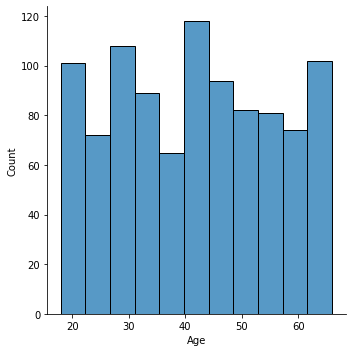

In [9]:
sns.displot(df['Age'])

In [14]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

SPLITTING DATASET

In [17]:
x = df.drop('PremiumPrice',axis=1)
y = df['PremiumPrice']

In [18]:
x.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')

In [20]:
print(y)

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(x, x, test_size=0.3, random_state=0) 

In [22]:
lin = LinearRegression()

In [23]:
lin.fit(X_train, Y_train)

LinearRegression()

In [28]:
#PREDICTING
pred = lin.predict(X_test)

[[ 3.60000000e+01  1.00000000e+00 -1.18778695e-14 ... -4.82938727e-15
  -6.82161956e-15 -4.27213032e-14]
 [ 4.60000000e+01  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  -8.38652491e-15  1.00000000e+00]
 [ 6.00000000e+01  2.73051649e-15  1.00000000e+00 ...  7.74885879e-15
   1.06892332e-14  2.00000000e+00]
 ...
 [ 5.70000000e+01  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   4.56027751e-15  2.00000000e+00]
 [ 6.20000000e+01  1.00000000e+00  1.00000000e+00 ...  3.77090153e-15
   5.26722046e-15  3.30382142e-14]
 [ 5.10000000e+01  2.08501663e-15  1.00000000e+00 ...  5.96575918e-15
   8.18099479e-15  1.00000000e+00]]


In [31]:
#ACCURACY
r2_score(Y_test,pred)

1.0